# SCIKIT-LEARN

In [1]:
work_flow=['0. An end to end scikit-learn workflow',
'1. Getting the data ready',
'2. choose the right estimator/algorithum for our problems',
'3. fit the model/algprithum and us it to make prediction on our data',
'4. evaluating a model',
'5. Improving a model',
'6. saving and LOAD  a trained model',
'7. Putting it all together'
]

# An end-to-end scikit-learn workflow

In [2]:
# 1. Get the data ready
import pandas as pd
import numpy as np
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
#creat x which is call (feature matrix)
x=heart_disease.drop('target',axis=1)

#creat y(label)
y=heart_disease["target"]

In [4]:
# chose the roght model and hyperparameter
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)

#we will keep the default hyperparameter
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
#Fit the model to thr data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [6]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3
121,59,1,0,138,271,0,0,182,0,0.0,2,0,2
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2
88,54,0,2,110,214,0,1,158,0,1.6,1,0,2


In [7]:
clf.fit(x_train,y_train);

In [8]:
#make some prediction
y_label=clf.predict(np.array([90,44,1,2,111,132]))

ValueError: Expected 2D array, got 1D array instead:
array=[ 90.  44.   1.   2. 111. 132.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [9]:
y_prediction=clf.predict(x_test)
y_prediction

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [10]:
y_test

221    0
66     1
53     1
137    1
91     1
      ..
108    1
257    0
283    0
68     1
133    1
Name: target, Length: 61, dtype: int64

In [11]:
clf.score(x_train,y_train)
#Return the mean accuracy on the given test data and labels.


1.0

In [12]:
clf.score(x_test,y_test)

0.8852459016393442

In [13]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        28
           1       0.86      0.94      0.90        33

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [14]:
confusion_matrix(y_test,y_prediction)

array([[23,  5],
       [ 2, 31]], dtype=int64)

In [15]:
accuracy_score(y_test,y_prediction)

0.8852459016393442

In [16]:
#5.Improving a model
#try different ammount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"trying mpdel with {i} estimators...")
    clf=RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"Model accuracy on text set:{clf.score(x_test,y_test)*100:.2f}%")
    print(" ")


trying mpdel with 10 estimators...
Model accuracy on text set:85.25%
 
trying mpdel with 20 estimators...
Model accuracy on text set:86.89%
 
trying mpdel with 30 estimators...
Model accuracy on text set:86.89%
 
trying mpdel with 40 estimators...
Model accuracy on text set:88.52%
 
trying mpdel with 50 estimators...
Model accuracy on text set:88.52%
 
trying mpdel with 60 estimators...
Model accuracy on text set:86.89%
 
trying mpdel with 70 estimators...
Model accuracy on text set:88.52%
 
trying mpdel with 80 estimators...
Model accuracy on text set:85.25%
 
trying mpdel with 90 estimators...
Model accuracy on text set:88.52%
 


# 7 saving and LOAD a trained model

In [19]:
import pickle
pickle.dump(clf,open("random_forst_model_1.pkl","wb"))

In [20]:
loaded_model=pickle.load(open("random_forst_model_1.pkl","rb"))
loaded_model.score(x_test,y_test)

0.8852459016393442

In [21]:
heart_disease.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
x=heart_disease.drop("target" ,axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [23]:
y=heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [25]:
x_train.shape,   x_test.shape ,   y_train.shape   ,y_test.shape

((242, 13), (61, 13), (242,), (61,))

# 1.1 Make sure its all numerical

In [26]:
car_data=pd.read_csv("data/car-sales-extended.csv")
car_data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [27]:
len(car_data)

1000

In [28]:
car_data.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [29]:
#spliting into x/y
x=car_data.drop("Price",axis=1)
y=car_data["Price"]

#spliting inti traning and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [30]:
#Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)



ValueError: could not convert string to float: 'Toyota'

In [31]:
##turn the categories into number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder();
transformer=ColumnTransformer([("one_hot",one_hot,
                               categorical_features)],
                              remainder="passthrough")
transformed_x=transformer.fit_transform(x)
transformed_x




array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [32]:
pd.DataFrame(transformed_x).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [33]:
#lets refits the model
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2)
model.fit(x_train,y_train)

RandomForestRegressor()

In [34]:
model.score(x_test,y_test)

0.3235867221569877

# 1.2 What if there were missing values?

1. Fill them with some values(also known as imputation)
2.Remove the samples with missing data altogether

In [1]:
import numpy as np
import pandas as pd
car_missing_data=pd.read_csv("data/car-sales-extended-missing-data.csv")
car_missing_data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [2]:
car_missing_data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [3]:
#create x and y
x=car_missing_data.drop("Price",axis=1)
y=car_missing_data["Price"]
x.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
dtype: int64

In [4]:
##turn the categories into number
##it will give error because we have missiing data in our data set

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder();
transformer=ColumnTransformer([("one_hot",one_hot,
                               categorical_features)],
                              remainder="passthrough")
transformed_x=transformer.fit_transform(x)
transformed_x

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

# option 1. Filling missing values

In [5]:
car_missing_data["Make"].fillna("missing",inplace=True)
car_missing_data["Colour"].fillna("missing",inplace=True)
car_missing_data["Odometer (KM)"].fillna(car_missing_data["Odometer (KM)"].mean(),inplace=True)
car_missing_data["Doors"].fillna(4,inplace=True)


In [6]:
car_missing_data.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [7]:
car_missing_data.dropna(inplace=True)
car_missing_data.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [8]:
#create x and y
x=car_missing_data.drop("Price",axis=1)
y=car_missing_data["Price"]
x.isna().sum()


Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64

# 1.Using `OneHotEncoder`

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder();
transformer=ColumnTransformer([("one_hot",one_hot,
                               categorical_features)],
                              remainder="passthrough")
transformed_x=transformer.fit_transform(car_missing_data)
df=pd.DataFrame(transformed_x)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


# 2.Using `get_dummies`

In [13]:
one_hot_encoded_data = pd.get_dummies(car_missing_data, columns = ["Make","Colour","Doors"])
one_hot_encoded_data

,Odometer (KM),Price,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Make_missing,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Colour_missing,Doors_3.0,Doors_4.0,Doors_5.0
0,35431.0,15323.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,192714.0,19943.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
2,84714.0,28343.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
3,154365.0,13434.0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,181577.0,14043.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,35820.0,32042.0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
996,155144.0,5716.0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
997,66604.0,31570.0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
998,215883.0,4001.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [14]:
#create x and y
x=car_missing_data.drop("Price",axis=1)
y=car_missing_data["Price"]
x.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64

In [15]:
np.random.seed(40)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
x_train,x_test,y_train,y_test=train_test_split(one_hot_encoded_data,y,test_size=0.2)
model.fit(x_train,y_train)

RandomForestRegressor()

In [16]:
model.score(x_test,y_test)

0.9999155076148739

# 2.Choosing the right estimator/model/algoritham

# 1.Pinking machine learning model for a regression problem

lets use california housing dataset

In [17]:
import numpy as pandas
import pandas as pd

In [18]:
#Get california housing data
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [19]:
housing_df=pd.DataFrame(housing["data"])
housing_df

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [20]:
housing_df=pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [21]:
housing_df["MedHouseVal"]=housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [22]:
housing_df["target"]=housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


In [23]:
housing_df=housing_df.drop(["MedHouseVal"],axis=1)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [24]:
#import algorithm/estimeter
from sklearn.linear_model import Ridge

#setup random seed
np.random.seed(42)

#create the data
x=housing_df.drop("target",axis=1)
y=housing_df["target"]

#split into train and test data set

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#instanntiate and fit the model
model=Ridge()
model.fit(x_train,y_train)
model.score(x_test,y_test)


0.5758549611440126

In [25]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8040225517255178

In [26]:
from sklearn import linear_model
np.random.seed(42)
model = linear_model.LassoLars(alpha=.1)
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8040225517255178

# 2 choosing an estimator for a classification problem

In [27]:
import pandas as pd
import numpy as np
heart_data=pd.read_csv("heart-disease.csv")
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
#import linearSCV  estimater class

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
np.random.seed(43)

#Make the data
x=heart_data.drop("target",axis=1)
y=heart_data["target"]

#split_the data
x_train ,x_test, y_train,y_test=train_test_split(x,y,test_size=0.2)

#instantiate LinearSVC
clf=LinearSVC()
clf.fit(x_train,y_train)

#evaluate accuracy
clf.score(x_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.7213114754098361

In [29]:
#import RandomForestClassifier  estimater class

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
np.random.seed(43)

#Make the data
x=heart_data.drop("target",axis=1)
y=heart_data["target"]

#split_the data
x_train ,x_test, y_train,y_test=train_test_split(x,y,test_size=0.2)

#instantiate RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

#evaluate accuracy
clf.score(x_test,y_test)

0.8852459016393442

# 3 Make prediction using a amchine learning model


2 way to make prediction

1. predict()
2. predict_proba()

In [30]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
242,64,1,0,145,212,0,0,132,0,2.0,1,2,1
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2
208,49,1,2,120,188,0,1,139,0,2.0,1,3,3
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2


In [31]:
clf.predict(x_test)

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [32]:
np.array([y_test])

array([[0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
        0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0]], dtype=int64)

In [33]:
#compare prediction to truth lables to evluate the model
y_preds=clf.predict(x_test)
np.mean(y_preds==y_test)

0.8852459016393442

In [34]:
clf.score(x_test,y_test)

0.8852459016393442

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8852459016393442

## `predict_proba()`

tell us how much accurate we are in each prediction

In [36]:
clf.predict_proba(x_test[:5])
#first colums tells the probability of false(0)
#second coluns tells the probability of truth(1)

array([[0.8 , 0.2 ],
       [0.21, 0.79],
       [0.61, 0.39],
       [0.23, 0.77],
       [0.06, 0.94]])

In [37]:
clf.predict(x_test[:5])

array([0, 1, 0, 1, 1], dtype=int64)

`predict()` can also be used for egression model

In [38]:
housing_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

#create the data
x=housing_df.drop("target",axis=1)
y=housing_df["target"]

#split into train and test sets
x_train,  x_test, y_train ,  y_test =train_test_split(x,y,test_size=0.2)

#create model intance
model=RandomForestRegressor(n_estimators=100)

#fit the model to the data
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8057655811971304

In [40]:
#make prediction
y_preds=model.predict(x_test)
y_preds[:10]
#score after predicting on X_test data means feature data

array([0.4943   , 0.7642   , 4.9346864, 2.56113  , 2.29764  , 1.6625701,
       2.34127  , 1.66352  , 2.48233  , 4.843458 ])

In [41]:
np.array(y_test[:10])
#y_test data means target data of our split data set

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [42]:
#comparre the prediction to truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.3267155795542638

In [43]:
work_flow


NameError: name 'work_flow' is not defined

# 4. Evaluating a machine learning model

Three ways to evaluatr sk learn model
  1. Estimators built-in `score()`method
  2.The `scoring`parameter
  3.Problem-specific metric function
   

# 4.1 Evaluating a model using the `score()` methods

In [44]:
#heart prediction model
model.score(x_test,y_test)
#Return the coefficient of determination

0.8057655811971304

# 4.2 Evaluating a model using the `scoring()` parameter

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
np.random.seed(43)

#Make the data
x=heart_data.drop("target",axis=1)
y=heart_data["target"]

#split_the data
x_train ,x_test, y_train,y_test=train_test_split(x,y,test_size=0.2)

#instantiate RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

#evaluate accuracy
cross_val_score(clf,x,y)

array([0.86885246, 0.86885246, 0.80327869, 0.8       , 0.81666667])

In [46]:
clf.score(x_test,y_test)

0.8852459016393442

In [47]:
np.random.seed(40)
cross_val_score(clf,x,y,cv=10)

array([0.87096774, 0.83870968, 0.87096774, 0.93333333, 0.83333333,
       0.8       , 0.66666667, 0.8       , 0.73333333, 0.83333333])

In [48]:
np.random.seed(45)

#single training and test split score
clf_single_score=clf.score(x_test,y_test)

#Taking the mean of 10-fold cross-validation score
clf_cross_val_score=np.mean(cross_val_score(clf,x,y,cv=10))

#compare the two
clf_single_score,clf_cross_val_score

(0.8852459016393442, 0.8347311827956989)

# 4.3 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

# 1.Accuracy

In [49]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
x=heart_data.drop("target",axis=1)
y=heart_data["target"]

clf=RandomForestClassifier()
cross_val_score=cross_val_score(clf,x,y,cv=20)

In [51]:
cross_val_score

array([0.875     , 0.875     , 0.8125    , 0.73333333, 0.8       ,
       0.93333333, 0.86666667, 1.        , 0.86666667, 0.86666667,
       0.86666667, 0.8       , 0.86666667, 0.73333333, 0.8       ,
       0.86666667, 0.66666667, 0.8       , 0.86666667, 0.73333333])

In [52]:
print("cross validation accurecy is")
print(np.mean(cross_val_score)*100)

cross validation accurecy is
83.14583333333333


# 2.Area under the receiver operating characteristic curve(AUC/ROC)**


`Area under curve(AUC)`

`ROC curve`

ROC curve are a comparision of a model's `true positive rate(trp)` versus a models `false positive rate(fpr)`

True positive =model prediction 1 when truth is 1

False positive=model predict 0 when truth is 0

True negative =model predicts 0 when truth is 0

False negative=model predicts 0 when truth is 1



In [53]:
from sklearn.metrics import roc_curve

In [54]:
#create x test....etc
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [55]:
from sklearn.metrics import roc_curve

#fit the classification
clf.fit(x_train,y_train)

#make prediction with probability
y_probs=clf.predict_proba(x_test)

y_probs[:10],len(y_probs)

(array([[0.98, 0.02],
        [0.34, 0.66],
        [0.67, 0.33],
        [0.04, 0.96],
        [0.99, 0.01],
        [0.2 , 0.8 ],
        [0.27, 0.73],
        [0.84, 0.16],
        [0.15, 0.85],
        [0.69, 0.31]]),
 61)

In [56]:
y_probs_positive=y_probs[:, 1]
y_probs_positive[:10]

array([0.02, 0.66, 0.33, 0.96, 0.01, 0.8 , 0.73, 0.16, 0.85, 0.31])

In [57]:
#calculate fpr,tpr and thresolds
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive)

#check thr flase post
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03846154, 0.03846154,
       0.07692308, 0.07692308, 0.07692308, 0.11538462, 0.19230769,
       0.19230769, 0.23076923, 0.30769231, 0.34615385, 0.38461538,
       0.42307692, 0.42307692, 0.53846154, 0.61538462, 0.73076923,
       0.80769231, 0.88461538, 0.96153846, 1.        ])

In [58]:
#creating function for plotting ROC curves
import matplotlib.pyplot as plt
def  plot_roc_curve(fpr,tpr):
    """"
    plots a ROC curve of false positive right(fpr) and 
    true positive right(tpr) of a model
    """
    
    plt.plot(fpr,tpr,color="blue",label="ROC")
    plt.xlabel("false positive right(fpr)")
    plt.ylabel("true postive rigth(tpr)")
    
    plt.title("Receiver Operating Characteristic(ROC) curve")
    plt.legend()
    
    plt.show()


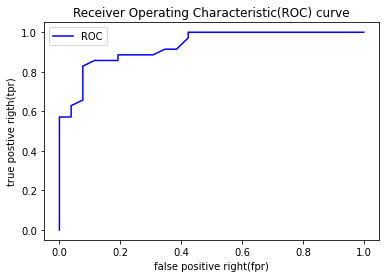

In [59]:
plot_roc_curve(fpr,tpr)

In [60]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)
#return area under curve max=1

0.9302197802197802

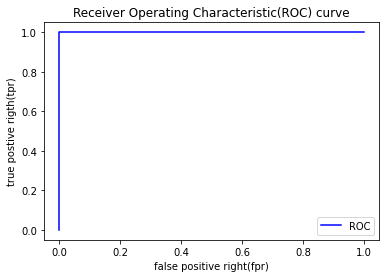

1.0

In [61]:
fpr,tpr,thresholds=roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)
roc_auc_score(y_test,y_test)

# 3.Confusion Matrix

A confusion matrix is a quick way to compare the labels a model predict and the
actual label it wa supposed to predict

In essence .giving us an idea of where is model get confused

In [62]:
from sklearn.metrics import confusion_matrix

y_preds=clf.predict(x_test)
confusion_matrix(y_test,y_preds)


array([[24,  2],
       [ 8, 27]], dtype=int64)

True positive =model prediction 1 when truth is 1

False positive=model predict 0 when truth is 0

True negative =model predicts 0 when truth is 0

False negative=model predicts 0 when truth is 1

In [63]:
data=pd.DataFrame(confusion_matrix(y_test,y_preds),columns=['PredictedFlase(0)','PredictedTrue(1)'],
                 index=["Actualfalse(0)","ActualTrue(1)"])
data

,PredictedFlase(0),PredictedTrue(1)
Actualfalse(0),24,2
ActualTrue(1),8,27


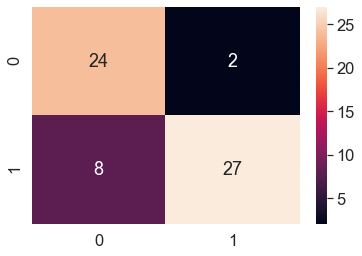

In [64]:
# making our confusion matrix more visual using heatmap()
import seaborn as sn
sn.set(font_scale=1.5)

conf_mat=confusion_matrix(y_test,y_preds)

sn.heatmap(conf_mat,annot=True);

# 5 Regression model evaluation matrics
1.R^2(r square also known as coefficient of determination)

2.Mean absolute error(MAE)

3.Mean square error(MSE)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
car_data=pd.read_csv("data/car-sales-extended-missing-data.csv")
car_data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [66]:
car_data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [67]:
car_data['Make'].fillna('missing',inplace=True)
car_data['Colour'].fillna('missing',inplace=True)
car_data['Odometer (KM)'].fillna(car_data['Odometer (KM)'].mean(),inplace=True)
car_data['Doors'].fillna(car_data['Doors'].mean(),inplace=True)
car_data['Price'].fillna(car_data['Price'].mean(),inplace=True)

In [69]:
car_data.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [70]:
one_hot_encoded_data = pd.get_dummies(car_data, columns = ["Make","Colour"])
one_hot_encoded_data

,Odometer (KM),Doors,Price,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Make_missing,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Colour_missing
0,35431.0,4.0,15323.0,0,1,0,0,0,0,0,0,0,1,0
1,192714.0,5.0,19943.0,1,0,0,0,0,0,1,0,0,0,0
2,84714.0,4.0,28343.0,0,1,0,0,0,0,0,0,0,1,0
3,154365.0,4.0,13434.0,0,0,0,1,0,0,0,0,0,1,0
4,181577.0,3.0,14043.0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,35820.0,4.0,32042.0,0,0,0,1,0,1,0,0,0,0,0
996,155144.0,3.0,5716.0,0,0,0,0,1,0,0,0,0,1,0
997,66604.0,4.0,31570.0,0,0,1,0,0,0,1,0,0,0,0
998,215883.0,4.0,4001.0,0,1,0,0,0,0,0,0,0,1,0


In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
x=one_hot_encoded_data.drop('Price',axis=1)
y=one_hot_encoded_data['Price']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)

RandomForestRegressor()

In [74]:
model.score(x_test,y_test)

0.3275490922742931

In [75]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()

clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.3896361493679922

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

x=housing_df.drop('target',axis=1)
y=housing_df['target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)
model.score(x_test,y_test)


0.8057655811971304

# Mean absolute error(MAE)


MEA is the avrage of the absolute difference between prediction and actual value

it give the idea of how our models prediction are

In [83]:
from sklearn.metrics import mean_absolute_error

y_preds=model.predict(x_test)
mae=mean_absolute_error(y_test,y_preds)
mae

0.3267155795542638

# Finally using the scoring parameter for classification problem

In [1]:
import numpy as np
import pandas as pd

heart_disease=pd.read_csv("Data/heart-disease.csv")

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x=heart_disease.drop("target",axis=1)
y=heart_disease['target']

clf=RandomForestClassifier(n_estimators=100)

In [3]:
np.random.seed(42)

#cross-validation accuracy
cv_acc=cross_val_score(clf,x,y,cv=5,scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [4]:
print("The cross-validated accuuracy is:",np.mean(cv_acc))

The cross-validated accuuracy is: 0.8248087431693989


In [5]:
np.random.seed(42)
cv_acc=cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [6]:
print("The cross-validated accuuracy is:",np.mean(cv_acc))

The cross-validated accuuracy is: 0.8248087431693989


In [7]:
#Precision
np.random.seed(42)
cv_precision=cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [8]:
print("The cross-validated precision is:",np.mean(cv_precision))

The cross-validated precision is: 0.8329547346025924


In [9]:
#Cross-validate recall
np.random.seed(42)
cv_recall=cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [10]:
print("The cross-validated recall is:",np.mean(cv_recall))

The cross-validated recall is: 0.8545454545454545


In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x=heart_disease.drop("target",axis=1)
y=heart_disease['target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_preds=clf.predict(x_test)

#clf.score(x_test,y_test)

`for all type of prection at onces`

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



# Lets see the `scoring` parameter being using for a regression problem..

In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

x=housing_df.drop('target',axis=1)
y=housing_df['target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestRegressor(n_estimators=100)

In [107]:
np.random.seed(42)
cv_r2=cross_val_score(model,x,y,cv=5,scoring =None)
cv_r2

array([0.51439304, 0.70297   , 0.74209547, 0.61796987, 0.68257245])

In [108]:
np.mean(cv_r2)

0.6520001654137009

In [109]:
#mean squared error
#more near to 0
cv_mse=cross_val_score(model,x,y,cv=5,scoring="neg_mean_squared_error")
cv_mse

array([-0.51587989, -0.34964835, -0.37431631, -0.44515521, -0.46745307])

In [110]:
np.mean(cv_mse)

-0.43049056824794985

In [111]:
#mean absolute error
cv_mae=cross_val_score(model,x,y,cv=5,scoring="neg_mean_absolute_error")
cv_mae

array([-0.54647047, -0.40673115, -0.43578715, -0.46286576, -0.47333859])

In [112]:
np.mean(cv_mae)

-0.46503862406007757

# 5.Improving a model
First prediction=baseline predictions.

First model=baseline model.


From a model prespective:
    
    *Could we collect more data(generaly,the more data,the better)
    
    *Could we improve our data?
    
From model prespective:
    
    *Is there better model we could use?
    
    *Could we improve the current model?

*Parameters=model find these patterns in data

*Hyperparameter=setting on the model we can adjust to(potentially) improve its ability
to find pattern

In [13]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Tuning huperparameter by hand

Lets make 3 sets

1.Traing

2.validation

3.test

In [14]:
clf.get_params() #hyperparameter that we can adjust

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We are going to try and adjust

`max_depth`
`max_features`
`min_sample_split`
`min_samples_split`
`n_estimators`

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
def evaluate_preds(y_true,y_preds):
    """"
    Perform evaluation comparison on y_true labels vs.y_pred labels
    on a classification.
    """
    accuracy=accuracy_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    
    metric_dict={"accuracy":round(accuracy,2),
                "precision":round(precision,2),
                "recall":round(recall,2),
                "f1":round(f1,2)}
    print(f"Acc:{accuracy * 100:.2f}%")
    print(f"Precision:{precision:.2f}%")
    print(f"Recall:{recall:.2f}%")
    print(f"F1 Score:{f1:.2f}%")
    
    return metric_dict
    
    

# Manual spliting of data

In [16]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

#shuffle the data
heart_disease_shuffled=heart_disease.sample(frac=1)

#Split into X and Y

x=heart_disease_shuffled.drop('target',axis=1)
y=heart_disease_shuffled['target']

#split the data into train,validation and test

train_split=round(0.7*len(heart_disease_shuffled)) #70% of data
valid_split=round(train_split+0.15 *len(heart_disease_shuffled)) #15% of data

x_train,y_train =x[:train_split],y[:train_split]
x_valid,y_valid=x[train_split:valid_split],y[train_split:valid_split]
x_test,y_test=x[valid_split:],y[valid_split:]

len(x_train), len(x_valid) ,len(x_test)


(212, 45, 46)

In [17]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

#make base line prediction
y_preds=clf.predict(x_valid)

#Evaluate the classifier on validation set
baseline_metrics=evaluate_preds(y_valid,y_preds)
baseline_metrics

Acc:82.22%
Precision:0.81%
Recall:0.88%
F1 Score:0.85%


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [18]:
np.random.seed(42)

#create a second classifier with different hyperparameter
clf2=RandomForestClassifier(n_estimators=100)
clf2.fit(x_train,y_train)

#make prediction
y_preds2=clf2.predict(x_valid)

#evaluate the 2nd classifier
clf2_metrics=evaluate_preds(y_valid,y_preds2)
clf2_metrics

Acc:82.22%
Precision:0.84%
Recall:0.84%
F1 Score:0.84%


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

In [19]:
np.random.seed(42)

#create a second classifier with different hyperparameter
clf3=RandomForestClassifier(n_estimators=100,max_depth=10)
clf3.fit(x_train,y_train)

#make prediction
y_preds3=clf3.predict(x_valid)

#evaluate the 2nd classifier
clf3_metrics=evaluate_preds(y_valid,y_preds3)
clf3_metrics

Acc:80.00%
Precision:0.81%
Recall:0.84%
F1 Score:0.82%


{'accuracy': 0.8, 'precision': 0.81, 'recall': 0.84, 'f1': 0.82}

# 5.2Hyperparameter tuning with RandomizedSearchCV

In [20]:
from sklearn.model_selection import RandomizedSearchCV
grid={"n_estimators":[10,100,200,1000,1200],
     "max_depth":[None,5,10,20,30],
     "max_features":["auto","sqrt"],
     "min_samples_split":[2,4,6],
     "min_samples_leaf":[1,2,4]}
np.random.seed(42)
#split into x and y
x=heart_disease_shuffled.drop('target',axis=1)
y=heart_disease_shuffled['target']

#split into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#instantiate RandomForestClassifier
clf=RandomForestClassifier(n_jobs=1)

#Setup RandomizesSearchCV
rs_clf=RandomizedSearchCV(estimator=clf,
                         param_distributions=grid,
                         n_iter=10,  #number of model to try
                         cv=5,
                         verbose=2)
##fit RandomizesSearchCV version of clf
rs_clf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total ti

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 1000,
                                                         1200]},
                   verbose=2)

In [21]:
rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 5}

In [22]:
#Make prediction with the best hyperparameters
rs_y_preds=rs_clf.predict(x_test)
rs_metrics=evaluate_preds(y_test,rs_y_preds)

Acc:83.61%
Precision:0.78%
Recall:0.89%
F1 Score:0.83%


In [27]:
rs_clf.predict([[63,1,145,233,1,0,150,0,2.3,0,0,1,1]])

array([0], dtype=int64)

# HyperParameter tuning using with GriSearchCV

use brute force technique to find best tuning

In [21]:
grid

{'n_estimators': [10, 100, 200, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [24]:
from sklearn.model_selection import GridSearchCV
np.random.seed(42)
#split into x and y
x=heart_disease_shuffled.drop('target',axis=1)
y=heart_disease_shuffled['target']

#split into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#instantiate RandomForestClassifier
clf=RandomForestClassifier(n_jobs=1)

#Setup RandomizesSearchCV
gs_clf=GridSearchCV(estimator=clf,
                         param_grid=grid,
                         cv=3,
                         verbose=2)
##fit RandomizesSearchCV version of clf
gs_clf.fit(x_train,y_train)

Fitting 3 folds for each of 450 candidates, totalling 1350 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, 

[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   1.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   1.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   1.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END max_depth=No

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   1.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   1.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   1.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None,

[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=auto, mi

[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.0s
[CV] END max_depth=5, max_features=auto, min_

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samp

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, m

[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.0s
[CV] END max_depth=10, max_features=a

[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto,

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END max_depth=10, max_features=s

[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto,

[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.9s
[CV] END max_depth=20, max_features=s

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt,

[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features

[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_features=a

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt,

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time=   1.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time=   1.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time=   1.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None, 5, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 100, 200, 1000, 1200]},
             verbose=2)

In [27]:
gs_y_preds=gs_clf.predict(x_test)
gs_metrics=evaluate_preds(y_test,gs_y_preds)

Acc:78.69%
Precision:0.73%
Recall:0.86%
F1 Score:0.79%


<AxesSubplot:>

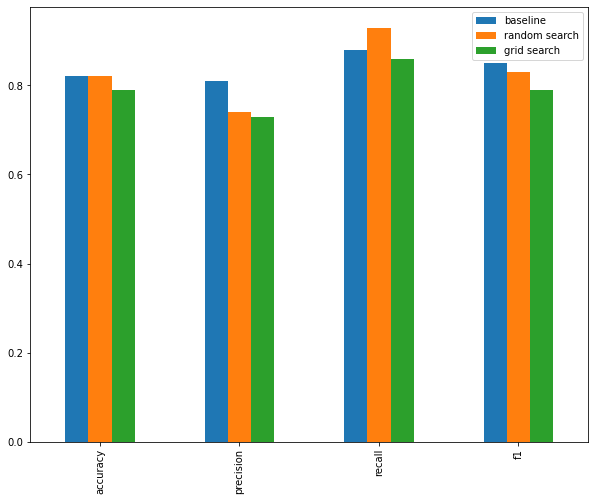

In [31]:
compare_metrics=pd.DataFrame({"baseline":baseline_metrics,
                             "random search":rs_metrics,
                             "grid search":gs_metrics})
compare_metrics.plot.bar(figsize=(10,8))

# 6 Saving and loading trained machine learning model

two way

1.With Python `pickle` module

2.with the `joblib` module

In [36]:
#pickle
import pickle
#save an extisting model o file
pickle.dump(rs_clf,open("RandomizedSearchCV_model.pk1","wb"))

AttributeError: 'builtin_function_or_method' object has no attribute 'dump'